In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import torch.nn as nn

## Creating Dataset

In [2]:
n_pts = 100
centers = [[-0.5,0.5],[0.5,-0.5]]
X,y = datasets.make_blobs(n_samples=n_pts,n_features=2,centers=centers,random_state=123,cluster_std=0.4)

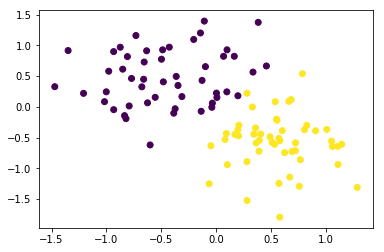

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)

In [4]:
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100,1))

## Perceptron Model

In [5]:
class Model(nn.Module):
    
    def __init__(self,input_size,output_size):
        super().__init__()
        self.linear = nn.Linear(input_size,output_size)
        
    def forward(self,x):
        pred = torch.sigmoid(self.linear(x))
        return pred
    
    def predict(self,x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [6]:
torch.manual_seed(2)
model = Model(2,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [7]:
[w,b] = model.parameters()

def get_params():
    w1,w2 = w.view(2)
    b1 = b[0]
    return(w1.item(),w2.item(),b1.item())

In [8]:
def plot_fit(title):
    plt.title = title
    #0 =w1x1 + w2x2 +b
    w1,w2,b1 = get_params()
    x1 = np.array([-2,2])
    x2 = (w1*x1 + b1)/(-w2)
    plt.plot(x1,x2,'r')
    plt.scatter(X[:,0],X[:,1],c=y)

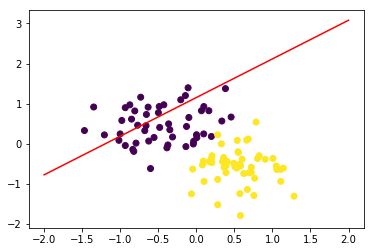

In [9]:
plot_fit('Initial Model')

# Training

In [10]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [11]:
epochs = 1000
losses = []
for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred,y_data)
    print("epoch: ",i,",loss: ",loss.item())
    losses.append(loss.item())
    
    optimizer.zero_grad()
    loss.backward()  # calculate the gradient
    optimizer.step() # upgrade parameters

epoch:  0 ,loss:  0.6185115575790405
epoch:  1 ,loss:  0.6174639463424683
epoch:  2 ,loss:  0.6164201498031616
epoch:  3 ,loss:  0.6153794527053833
epoch:  4 ,loss:  0.614342451095581
epoch:  5 ,loss:  0.6133086681365967
epoch:  6 ,loss:  0.6122783422470093
epoch:  7 ,loss:  0.6112515330314636
epoch:  8 ,loss:  0.6102280616760254
epoch:  9 ,loss:  0.6092080473899841
epoch:  10 ,loss:  0.6081910729408264
epoch:  11 ,loss:  0.6071775555610657
epoch:  12 ,loss:  0.606167733669281
epoch:  13 ,loss:  0.6051608324050903
epoch:  14 ,loss:  0.604157567024231
epoch:  15 ,loss:  0.6031574606895447
epoch:  16 ,loss:  0.602160632610321
epoch:  17 ,loss:  0.6011670827865601
epoch:  18 ,loss:  0.6001767516136169
epoch:  19 ,loss:  0.599189817905426
epoch:  20 ,loss:  0.5982059836387634
epoch:  21 ,loss:  0.5972254276275635
epoch:  22 ,loss:  0.5962479114532471
epoch:  23 ,loss:  0.5952739119529724
epoch:  24 ,loss:  0.5943028926849365
epoch:  25 ,loss:  0.5933352112770081
epoch:  26 ,loss:  0.592370

epoch:  419 ,loss:  0.3696579039096832
epoch:  420 ,loss:  0.36933472752571106
epoch:  421 ,loss:  0.36901217699050903
epoch:  422 ,loss:  0.3686903417110443
epoch:  423 ,loss:  0.36836928129196167
epoch:  424 ,loss:  0.36804884672164917
epoch:  425 ,loss:  0.36772921681404114
epoch:  426 ,loss:  0.3674103617668152
epoch:  427 ,loss:  0.36709222197532654
epoch:  428 ,loss:  0.3667745590209961
epoch:  429 ,loss:  0.3664577901363373
epoch:  430 ,loss:  0.36614182591438293
epoch:  431 ,loss:  0.3658263683319092
epoch:  432 ,loss:  0.3655116558074951
epoch:  433 ,loss:  0.36519768834114075
epoch:  434 ,loss:  0.3648843765258789
epoch:  435 ,loss:  0.3645719587802887
epoch:  436 ,loss:  0.36425986886024475
epoch:  437 ,loss:  0.36394867300987244
epoch:  438 ,loss:  0.36363810300827026
epoch:  439 ,loss:  0.36332833766937256
epoch:  440 ,loss:  0.3630192279815674
epoch:  441 ,loss:  0.3627106547355652
epoch:  442 ,loss:  0.3624027967453003
epoch:  443 ,loss:  0.3620957136154175
epoch:  444 ,

epoch:  835 ,loss:  0.2780497670173645
epoch:  836 ,loss:  0.277899831533432
epoch:  837 ,loss:  0.27775004506111145
epoch:  838 ,loss:  0.27760061621665955
epoch:  839 ,loss:  0.2774512767791748
epoch:  840 ,loss:  0.27730220556259155
epoch:  841 ,loss:  0.2771534025669098
epoch:  842 ,loss:  0.27700480818748474
epoch:  843 ,loss:  0.276856392621994
epoch:  844 ,loss:  0.2767082452774048
epoch:  845 ,loss:  0.27656033635139465
epoch:  846 ,loss:  0.2764126658439636
epoch:  847 ,loss:  0.2762651741504669
epoch:  848 ,loss:  0.27611789107322693
epoch:  849 ,loss:  0.27597084641456604
epoch:  850 ,loss:  0.2758239507675171
epoch:  851 ,loss:  0.2756773829460144
epoch:  852 ,loss:  0.27553099393844604
epoch:  853 ,loss:  0.2753848731517792
epoch:  854 ,loss:  0.27523890137672424
epoch:  855 ,loss:  0.2750931978225708
epoch:  856 ,loss:  0.27494773268699646
epoch:  857 ,loss:  0.27480238676071167
epoch:  858 ,loss:  0.27465736865997314
epoch:  859 ,loss:  0.27451249957084656
epoch:  860 ,l

Text(0.5,0,'epoch')

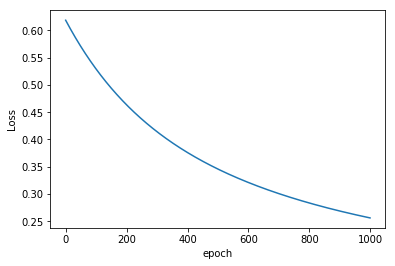

In [12]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

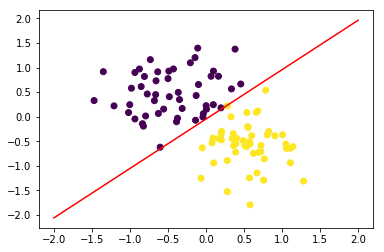

In [13]:
plot_fit("Trained Model")

## Testing

Red point postivie probability = 0.9424158334732056
Blue point postivie probability = 0.05055497586727142
Red point in class 1
Blue point in class 0


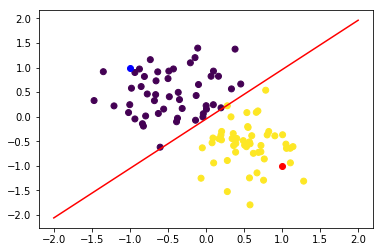

In [14]:
point1 = torch.Tensor([1.0,-1.0])
point2 = torch.Tensor([-1.0,1.0])
plt.plot(point1.numpy()[0],point1.numpy()[1],'ro')
plt.plot(point2.numpy()[0],point2.numpy()[1],'bo')
plot_fit("Trained Model")
print("Red point postivie probability = {}".format(model.forward(point1).item()))
print("Blue point postivie probability = {}".format(model.forward(point2).item()))
print("Red point in class {}".format(model.predict(point1)))
print("Blue point in class {}".format(model.predict(point2)))